In [1]:
import sys
sys.path.append("C:\\Users\\HP\\Documents\\GitHub\\Computing-Final\\PopularityContest\\Load")
from PopularityContest.Model.best_model import tuning
from PopularityContest.Model.best_model import fit_n_predict
from PopularityContest.Model.best_model import conf_mat
from PopularityContest.Model.best_model import plot_feats
from PopularityContest.Process.feature1 import *
from PopularityContest.Process.feature2 import *
from PopularityContest.Process.feature3 import *
from PopularityContest.Model.split import tt_split
from PopularityContest.Load.data import data
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [2]:
data.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,Top50
0,0.887,0.234,9,-14.520,1,0.1780,0.1110,0.670000,0.1300,0.197,140.020,audio_features,2mnXxnrX5vCGolNkaFvVeM,spotify:track:2mnXxnrX5vCGolNkaFvVeM,https://api.spotify.com/v1/tracks/2mnXxnrX5vCG...,https://api.spotify.com/v1/audio-analysis/2mnX...,196800,4,1
1,0.793,0.736,7,-3.254,0,0.0469,0.0822,0.000000,0.1090,0.656,112.993,audio_features,2t6IxTASaSFkZEt61tQ6W6,spotify:track:2t6IxTASaSFkZEt61tQ6W6,https://api.spotify.com/v1/tracks/2t6IxTASaSFk...,https://api.spotify.com/v1/audio-analysis/2t6I...,237525,4,1
2,0.835,0.679,7,-5.329,0,0.0364,0.5830,0.000002,0.2180,0.850,124.980,audio_features,5ww2BF9slyYgNOk37BlC4u,spotify:track:5ww2BF9slyYgNOk37BlC4u,https://api.spotify.com/v1/tracks/5ww2BF9slyYg...,https://api.spotify.com/v1/audio-analysis/5ww2...,162638,4,1
3,0.751,0.761,11,-4.113,0,0.1500,0.2510,0.000238,0.0991,0.553,92.032,audio_features,0oBtwScT4B4BR5kZitNWd5,spotify:track:0oBtwScT4B4BR5kZitNWd5,https://api.spotify.com/v1/tracks/0oBtwScT4B4B...,https://api.spotify.com/v1/audio-analysis/0oBt...,151325,4,1
4,0.621,0.782,2,-5.548,1,0.0440,0.0125,0.033000,0.2300,0.550,128.033,audio_features,2tTmW7RDtMQtBk7m2rYeSw,spotify:track:2tTmW7RDtMQtBk7m2rYeSw,https://api.spotify.com/v1/tracks/2tTmW7RDtMQt...,https://api.spotify.com/v1/audio-analysis/2tTm...,198938,4,1


In [3]:
data.drop(columns=["id"], axis = 1, inplace=True)
data.drop(columns=["type"], axis = 1, inplace=True)
data.drop(columns=["uri"], axis = 1, inplace=True)
data.drop(columns=["track_href"], axis = 1, inplace=True)
data.drop(columns=["analysis_url"], axis = 1, inplace=True)
data = feature1(data)
data = genre(data)
data = time(data, "seconds")
data.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Top50,happy,HipHop,Reggaeton,Pop,House/Electro/Techno,duration_s
0,0.887,0.234,9,-14.520,1,0.1780,0.1110,0.670000,0.1300,0.197,140.020,4,1,0,0,0,0,1,196.800
1,0.793,0.736,7,-3.254,0,0.0469,0.0822,0.000000,0.1090,0.656,112.993,4,1,1,0,0,1,0,237.525
2,0.835,0.679,7,-5.329,0,0.0364,0.5830,0.000002,0.2180,0.850,124.980,4,1,1,0,0,1,1,162.638
3,0.751,0.761,11,-4.113,0,0.1500,0.2510,0.000238,0.0991,0.553,92.032,4,1,1,1,1,0,0,151.325
4,0.621,0.782,2,-5.548,1,0.0440,0.0125,0.033000,0.2300,0.550,128.033,4,1,1,0,0,1,1,198.938


In [4]:
X_train, X_test, y_train, y_test = tt_split(data,"Top50")
X_test

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,happy,HipHop,Reggaeton,Pop,House/Electro/Techno,duration_s
644,0.660,0.942,4,-2.273,1,0.1850,0.007890,0.000018,0.8340,0.543,126.017,4,1,0,0,1,1,158.571
1032,0.731,0.807,3,-6.492,0,0.1000,0.181000,0.751000,0.3190,0.765,114.759,4,1,0,0,1,0,179.120
163,0.663,0.600,7,-10.870,1,0.0320,0.430000,0.000000,0.1840,0.800,129.991,4,1,0,0,1,1,151.667
1009,0.622,0.807,5,-6.752,0,0.4080,0.103000,0.000000,0.3060,0.892,174.060,4,1,0,0,0,1,220.293
909,0.691,0.631,2,-6.478,1,0.0368,0.048300,0.000011,0.1040,0.800,92.004,4,1,1,1,0,0,161.124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,0.495,0.951,10,-3.010,0,0.1490,0.000600,0.000000,0.1160,0.515,95.010,4,1,0,1,0,0,212.082
1130,0.770,0.226,2,-9.136,1,0.0314,0.914000,0.000035,0.0991,0.222,117.949,4,0,0,0,1,0,234.028
650,0.791,0.736,11,-6.568,0,0.0381,0.133000,0.864000,0.0749,0.786,123.998,4,1,0,0,1,1,183.911
575,0.697,0.525,10,-8.149,0,0.1390,0.748000,0.000055,0.1030,0.630,86.940,4,1,1,0,0,0,199.826


In [5]:
parameters_forest = {
    "criterion" : ['gini', 'entropy'],
    "max_depth" : [4, 5, 6, 7, 8, 9, 10, 11, 12],
    "max_features" : ['auto', 'log2', 'sqrt'],
    "min_samples_split" : [2, 4, 6, 8, 10]
}

In [6]:
rf = tuning(RandomForestClassifier(random_state=1), parameters_forest, X_train, y_train)

rf

rf, predictions_rf = fit_n_predict(X_train, X_test, y_train, y_test, rf)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Estimator:  RandomForestClassifier(max_depth=6, min_samples_split=4, random_state=1)  

Accuracy Score: 0.97
Precision Score: 0.00
Recall Score: 0.00
F1 Score: 0.00


c:\Users\HP\anaconda3\envs\CDS_Final\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


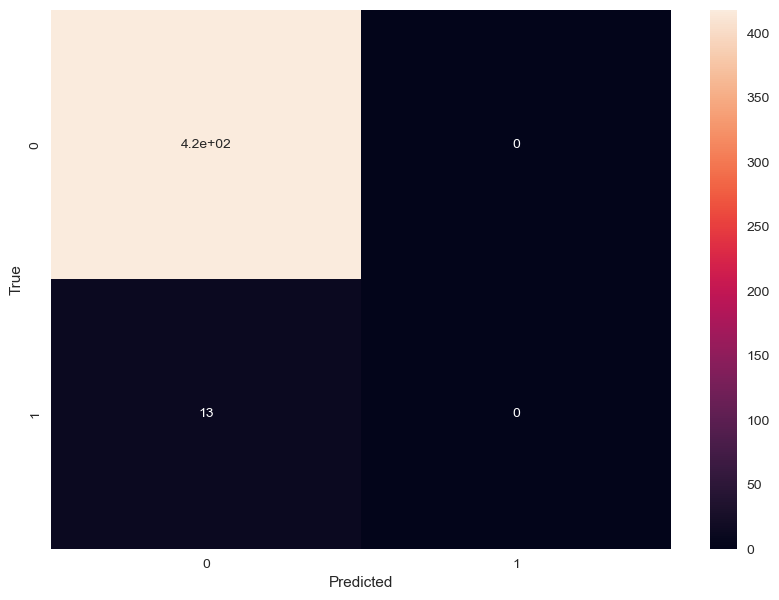

In [7]:
conf_mat(y_test, predictions_rf)

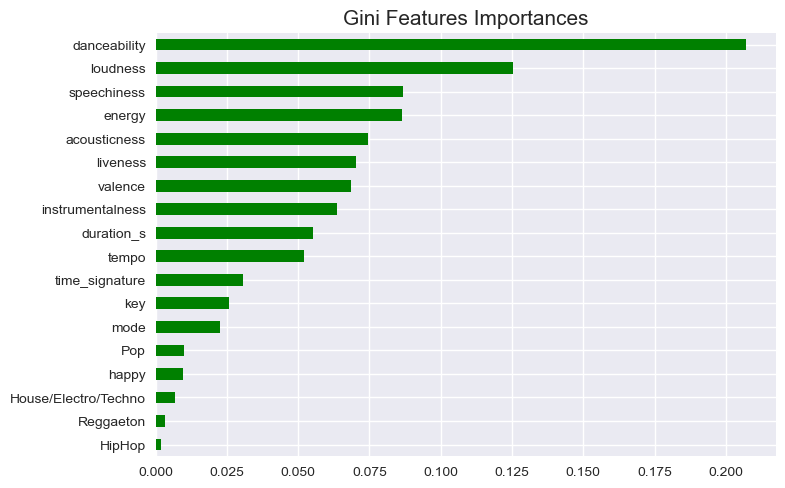

In [8]:
X=data.drop(columns=["Top50"], axis=1)
plot_feats(rf, X)